<a href="https://colab.research.google.com/github/Cryslender/Codealpha_tasks/blob/main/Amazon_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Project

The purpose of the project is to predict the next day closing price of Amazon using y_finance library

# Process of the project

* Ask the question
* Get Data
* Investigate Data
* Prepare Data
* Analyze Data
* Preprocessing
* Model Design
* Model Training
* Model Testing
* Close Price Prediction

## Ask the question
* The analytics process always starts with a question to be answered in this project is the question regarding amazon closing
price
* What is the Amazon next day closing price?

## Get Data

* This step involves the process of locating and obtaining data that is relevant to the question, and then determining if there is enough data to complete the analysis
* Get 10 years Amazon data from Yahoo Finance

In [ ]:
import yfinance as yf

amazon_price = yf.download('AMZN', period="10y")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#display the data
amazon_price.head()

Open    High      Low    Close  Adj Close    Volume
Date                                                              
2014-05-15  14.9010  14.960  14.5190  14.7595    14.7595  85902000
2014-05-16  14.6400  14.944  14.5775  14.8850    14.8850  72736000
2014-05-19  14.7880  14.950  14.6905  14.8380    14.8380  45684000
2014-05-20  14.8550  15.223  14.8375  15.0595    15.0595  81914000
2014-05-21  15.1105  15.298  15.0760  15.2505    15.2505  68176000

## Investigate the data

* Data comes in many forms and from many different sources. This step involves determining if the data is complete and contains the relevant information for the analysis

## Prepare the data

* This step can involve many tasks to transform the data into a format appropriate for the tools that will be used to analyze and present the data. This process is sometimes referred to as “cleaning” the data, because there may be blank records or obvious errors in the data set
* This step is where by the cleaning of the data take place to make sure the data is ready for analysis
* Since that the project is to predicting the closing price, I will drop the column and the volume column and technical indicator and also the target column

#### Shape of the data

In [ ]:
#checking the shape of the date
amazon_price.shape

(2518, 6)

#### Checking Colunm Names

In [ ]:
#check the attributes of the dataset
amazon_price.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Missing Values

In [ ]:
#check the null values
amazon_price.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Duplicates

In [ ]:
# check the duplicates
amazon_price.duplicated().sum()

0

#### Unique Values

In [ ]:
# count unique values in dataset
amazon_price.nunique()

Open         2420
High         2458
Low          2463
Close        2478
Adj Close    2478
Volume       2479
dtype: int64

#### Information about the data

In [ ]:
# check the information about the data
amazon_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-05-15 to 2024-05-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


#### Statistical Summary

In [ ]:
# calculate statics of the data
amazon_price.describe().T

count          mean           std           min           25%  \
Open       2518.0  9.016021e+01  5.236977e+01  1.422000e+01  3.901175e+01   
High       2518.0  9.119631e+01  5.299536e+01  1.452100e+01  3.925937e+01   
Low        2518.0  8.903528e+01  5.168946e+01  1.420000e+01  3.860275e+01   
Close      2518.0  9.013700e+01  5.233402e+01  1.434750e+01  3.901288e+01   
Adj Close  2518.0  9.013700e+01  5.233402e+01  1.434750e+01  3.901288e+01   
Volume     2518.0  7.844341e+07  4.087898e+07  1.553322e+07  5.283738e+07   

                    50%           75%           max  
Open       8.964725e+01  1.366501e+02  1.891600e+02  
High       9.028300e+01  1.388050e+02  1.917000e+02  
Low        8.855000e+01  1.350075e+02  1.874400e+02  
Close      8.951250e+01  1.372775e+02  1.895000e+02  
Adj Close  8.951250e+01  1.372775e+02  1.895000e+02  
Volume     6.723400e+07  9.159250e+07  4.771220e+08

#### Distribution of the data

In [ ]:
# find the ditributiob of the data
from scipy.stats import shapiro

# Selecting only numerical columns for normality test
numerical_columns = amazon_price.select_dtypes(include='number')

# Perform Shapiro-Wilk test for normality for each numerical column
for column in numerical_columns.columns:
    statistic, p_value = shapiro(amazon_price[column])
    alpha = 0.05  # Significance level
    if p_value > alpha:
        print(f"The {column} values are normally distributed (fail to reject H0)")
    else:
        print(f"The {column} values are not normally distributed (reject H0)")


The Open values are not normally distributed (reject H0)
The High values are not normally distributed (reject H0)
The Low values are not normally distributed (reject H0)
The Close values are not normally distributed (reject H0)
The Adj Close values are not normally distributed (reject H0)
The Volume values are not normally distributed (reject H0)


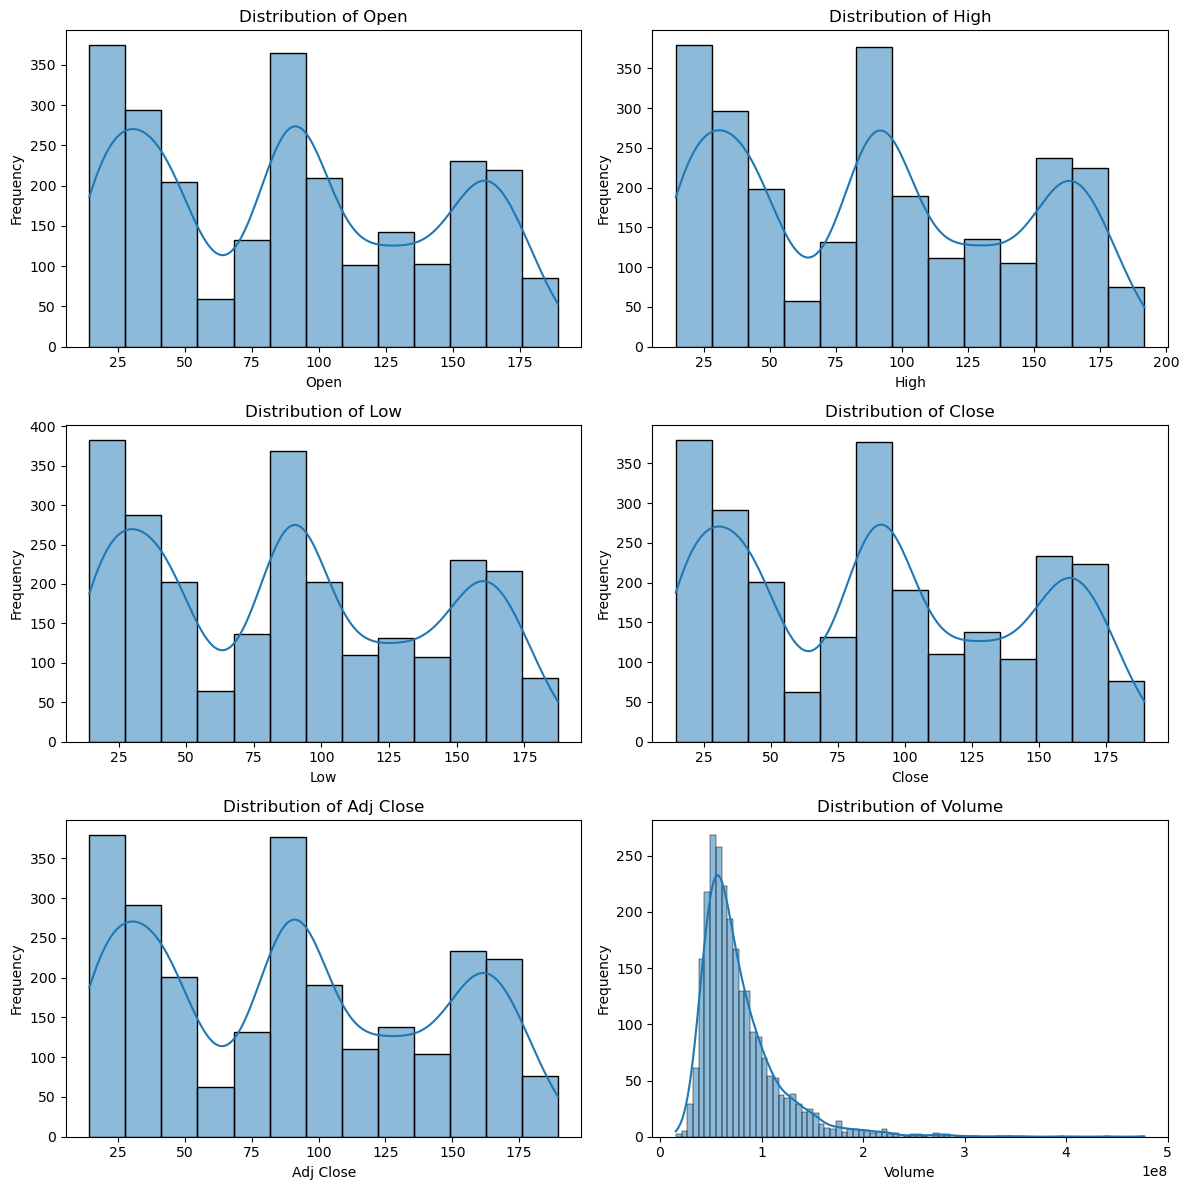

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Select the columns for which you want to visualize the distributions
columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']

# Create histograms or kernel density plots for each variable
plt.figure(figsize=(12, 12))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(amazon_price[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Skewness of the data

In [ ]:
# check the skweness of the data
from scipy.stats import skew
import numpy as np

# Calculate skewness for each numerical column
skewness = amazon_price.apply(skew)

# Display skewness values
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Open         0.165744
High         0.161288
Low          0.169711
Close        0.164421
Adj Close    0.164421
Volume       2.681879
dtype: float64


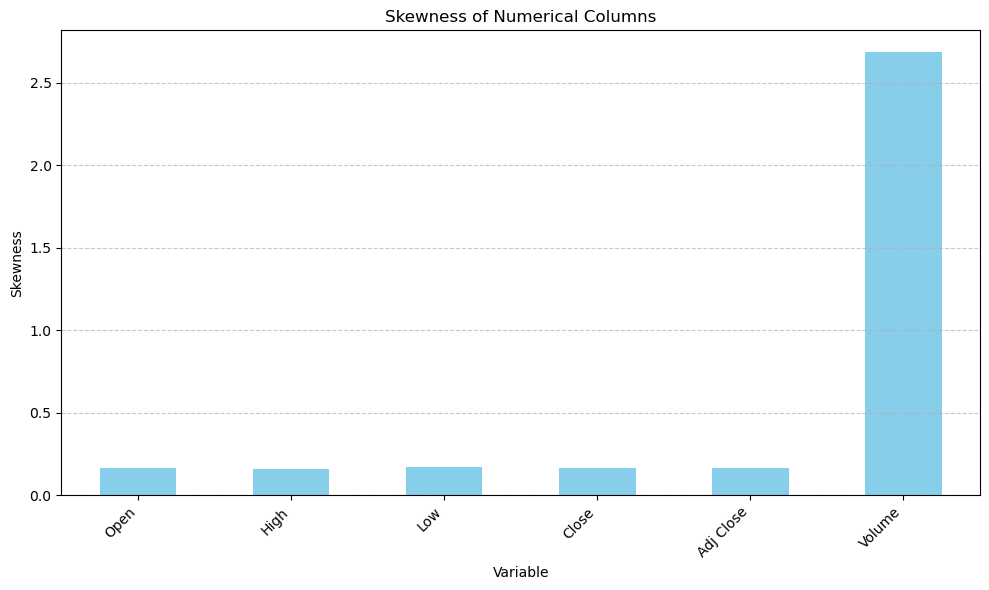

In [ ]:
# Create a bar plot to visualize skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Variable')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Outlier Detection

In [ ]:
#detect oulier

def detect_outliers_iqr(data):
    # Select numerical columns for outlier detection
    numeric_columns = data.select_dtypes(include=['number'])

    # Calculate the first quartile (Q1) and third quartile (Q3) for each numerical column
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)

    # Calculate the interquartile range (IQR) for each numerical column
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each numerical column
    outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

    # Display the count of outliers for each numerical column
    print("Count of outliers for each numerical column:")
    print(outliers.sum())

    # Display the rows with outliers
    outlier_rows = data[outliers.any(axis=1)]
    print("Rows with outliers:")
    print(outlier_rows)

    return outliers, outlier_rows

In [ ]:
# Detect outliers using the function
outliers, outlier_rows = detect_outliers_iqr(amazon_price)

Count of outliers for each numerical column:
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       139
dtype: int64
Rows with outliers:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-06-05   15.405000   16.396999   15.345000   16.178499   16.178499   
2014-07-11   16.735500   17.350000   16.735500   17.309999   17.309999   
2014-07-25   15.865000   16.243500   15.738000   16.200500   16.200500   
2014-10-23   15.670000   15.840000   15.570000   15.659000   15.659000   
2014-10-24   14.220000   14.690500   14.200000   14.353000   14.353000   
...                ...         ...         ...         ...         ...   
2022-11-01  103.989998  104.580002   96.059998   96.790001   96.790001   
2022-11-10   92.940002   98.690002   91.650002   96.629997   96.629997   
2023-02-02  110.250000  114.000000  108.879997  112.910004  112.910004   
2023-0

#### Handle Outliers

In [ ]:
# Define the columns with a significant number of outliers
column_with_outliers = ['Volume']

# Winsorization function to handle outliers
def winsorize_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)
    return column

# Transformation function (log transformation) to handle outliers
def log_transform(column):
    return np.log1p(column)

# Apply outlier handling techniques for each column
for column in column_with_outliers:
    if column in ['Volume']:
        # Apply Winsorization for columns with a large number of outliers
        amazon_price[column] = winsorize_outliers(amazon_price[column])
    elif column in ['Open', 'High', 'Low', 'Close','Adj Close']:
        # Apply log transformation for columns with a large number of outliers
        amazon_price[column] = log_transform(amazon_price[column])

# Print the modified dataset after outlier handling
print(amazon_price)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-05-15   14.901000   14.960000   14.519000   14.759500   14.759500   
2014-05-16   14.640000   14.944000   14.577500   14.885000   14.885000   
2014-05-19   14.788000   14.950000   14.690500   14.838000   14.838000   
2014-05-20   14.855000   15.223000   14.837500   15.059500   15.059500   
2014-05-21   15.110500   15.298000   15.076000   15.250500   15.250500   
...                ...         ...         ...         ...         ...   
2024-05-09  188.880005  191.699997  187.440002  189.500000  189.500000   
2024-05-10  189.160004  189.889999  186.929993  187.479996  187.479996   
2024-05-13  188.000000  188.309998  185.360001  186.570007  186.570007   
2024-05-14  183.820007  187.720001  183.449997  187.070007  187.070007   
2024-05-15  185.770004  186.719299  182.729996  184.329895  184.329895   

                Volume  
Date        

## Analyse data

* Analysis is the process of identifying patterns, correlations, and relationships contained within a data set or sets to draw inferences and conclusions.

#### Explorative Data Analysis

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
#initialize profile variable to use it to find the analytics about the data
profile= ProfileReport(amazon_price,title="Amazon Report", explorative=True)

In [ ]:
#Output the report about the data
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Pattern/Trend

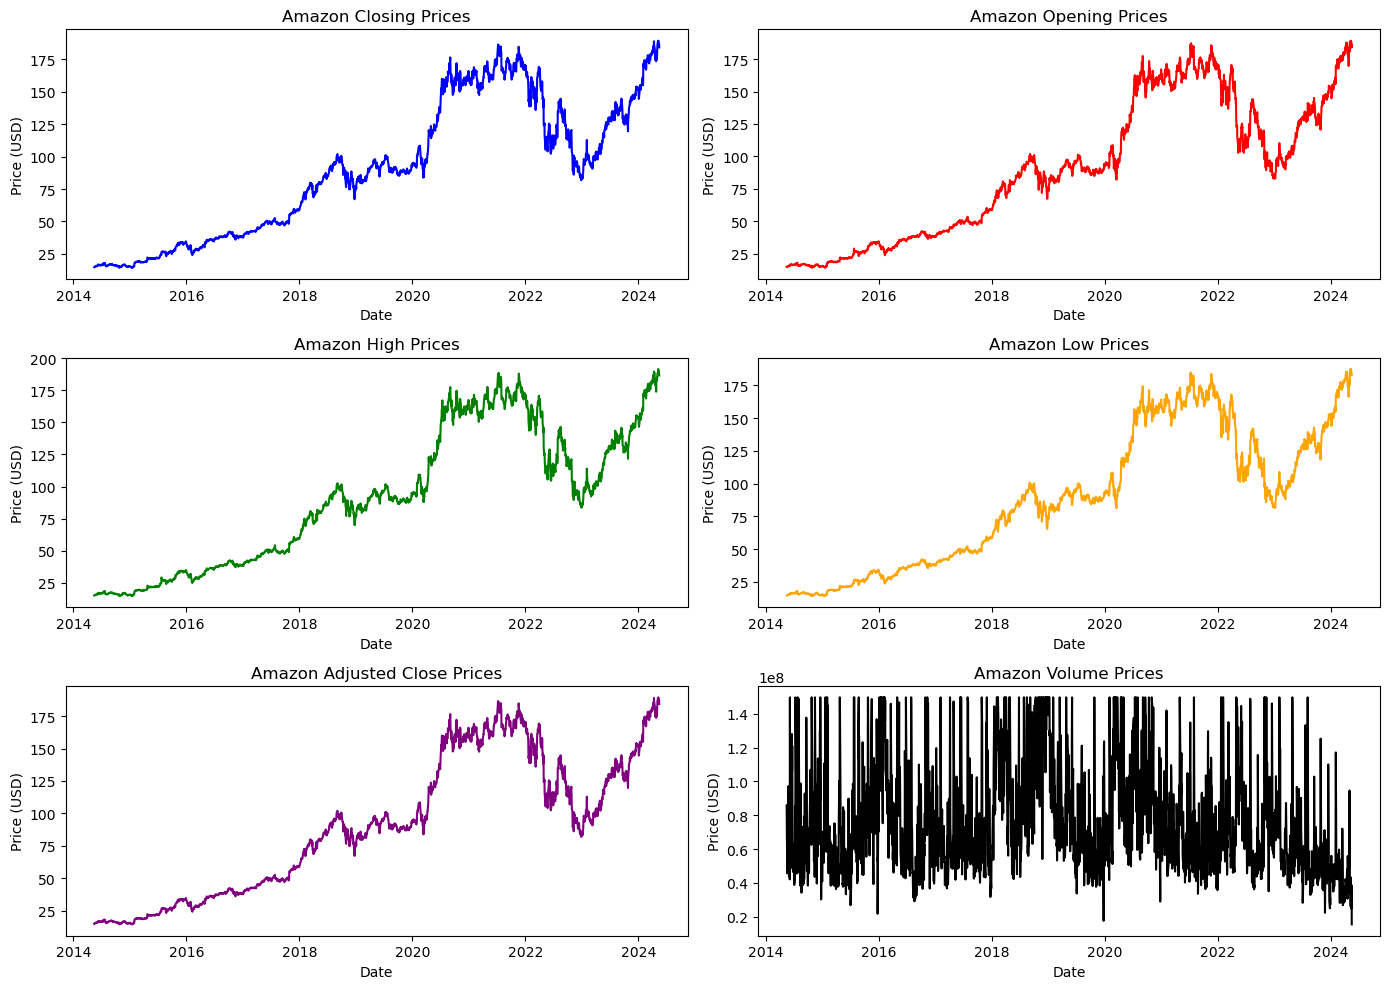

In [ ]:
import pandas as pd

# Create a figure and axis object with 2 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Reset index to default integer index
amazon_price = amazon_price.reset_index()

# Plot Closing Price
amazon_price['Date'] = pd.to_datetime(amazon_price['Date'])  # Convert 'Date' column to datetime if it's not already
axs[0, 0].plot(amazon_price['Date'], amazon_price['Close'], color='blue', label='Closing Price')
axs[0, 0].set_title('Amazon Closing Prices')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price (USD)')

# Plot Opening Price
axs[0, 1].plot(amazon_price['Date'], amazon_price['Open'], color='red', label='Opening Price')
axs[0, 1].set_title('Amazon Opening Prices')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price (USD)')

# Plot High Price
axs[1, 0].plot(amazon_price['Date'], amazon_price['High'], color='green', label='High Price')
axs[1, 0].set_title('Amazon High Prices')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Price (USD)')

# Plot Low Price
axs[1, 1].plot(amazon_price['Date'], amazon_price['Low'], color='orange', label='Low Price')
axs[1, 1].set_title('Amazon Low Prices')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Price (USD)')

# Plot Adjusted Close Price
axs[2, 0].plot(amazon_price['Date'], amazon_price['Adj Close'], color='purple', label='Adjusted Close Price')
axs[2, 0].set_title('Amazon Adjusted Close Prices')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('Price (USD)')

# Plot Volume
axs[2, 1].plot(amazon_price['Date'], amazon_price['Volume'], color='Black', label='Volume Price')
axs[2, 1].set_title('Amazon Volume Prices')
axs[2, 1].set_xlabel('Date')
axs[2, 1].set_ylabel('Price (USD)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

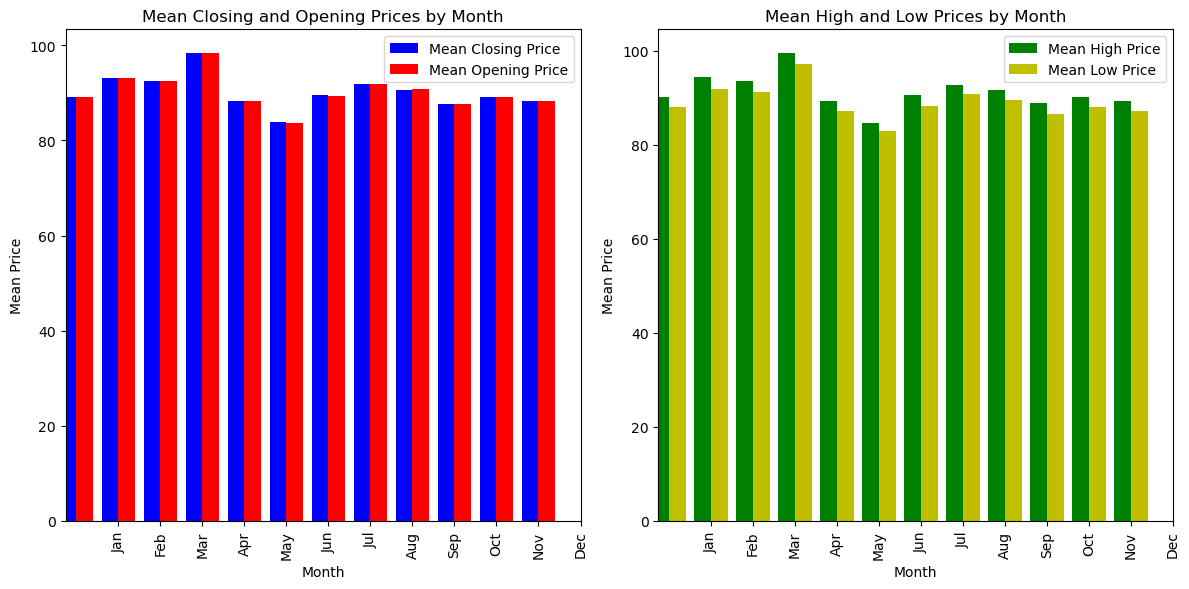

In [ ]:
# Set "Date" column as the index
amazon_price.set_index("Date", inplace=True)

# Group the high and low prices by months
monthly_high = amazon_price.groupby(amazon_price.index.month)["High"].mean()
monthly_low = amazon_price.groupby(amazon_price.index.month)["Low"].mean()
# Group the Open and Close prices by months
monthly_close = amazon_price.groupby(amazon_price.index.month)["Close"].mean()
monthly_open = amazon_price.groupby(amazon_price.index.month)["Open"].mean()

# Create a figure and axis object
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the mean closing price by month
monthly_close.plot(kind="bar", color='b', width=0.4, position=1, ax=axs[0], label="Mean Closing Price")

# Plot the mean opening price by month
monthly_open.plot(kind="bar", color='r', width=0.4, position=0, ax=axs[0], label="Mean Opening Price")

# Set the x-axis ticks to display month names
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Set labels and title for the first subplot
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Mean Price")
axs[0].set_title("Mean Closing and Opening Prices by Month")
axs[0].legend()

# Plot the mean high price by month
monthly_high.plot(kind="bar", color='g', width=0.4, position=1, ax=axs[1], label="Mean High Price")

# Plot the mean low price by month
monthly_low.plot(kind="bar", color='y', width=0.4, position=0, ax=axs[1], label="Mean Low Price")

# Set the x-axis ticks to display month names
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Set labels and title for the second subplot
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Mean Price")
axs[1].set_title("Mean High and Low Prices by Month")
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Correlation

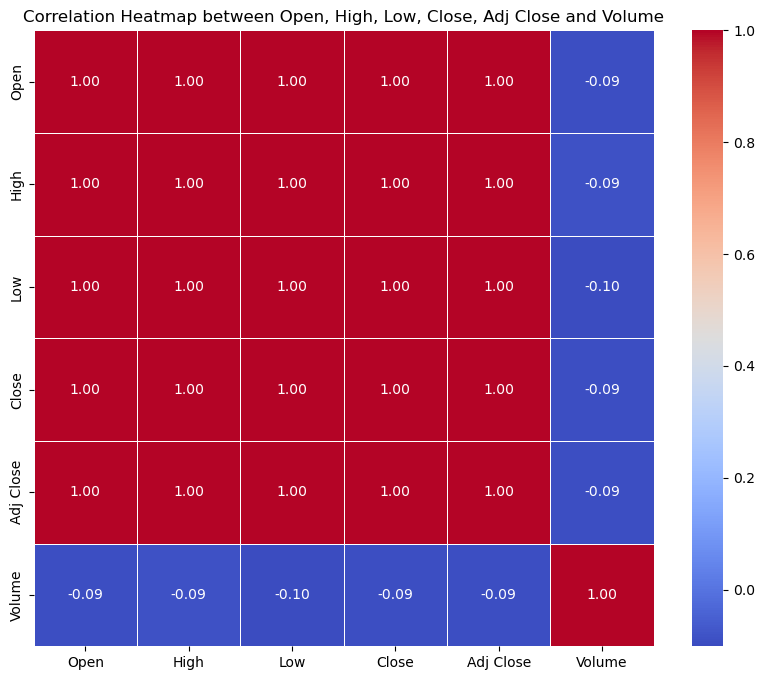

In [ ]:
correlation_matrix = amazon_price[['Open', 'High', 'Low', 'Close','Adj Close','Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Open, High, Low, Close, Adj Close and Volume')
plt.show()

#### Relationship

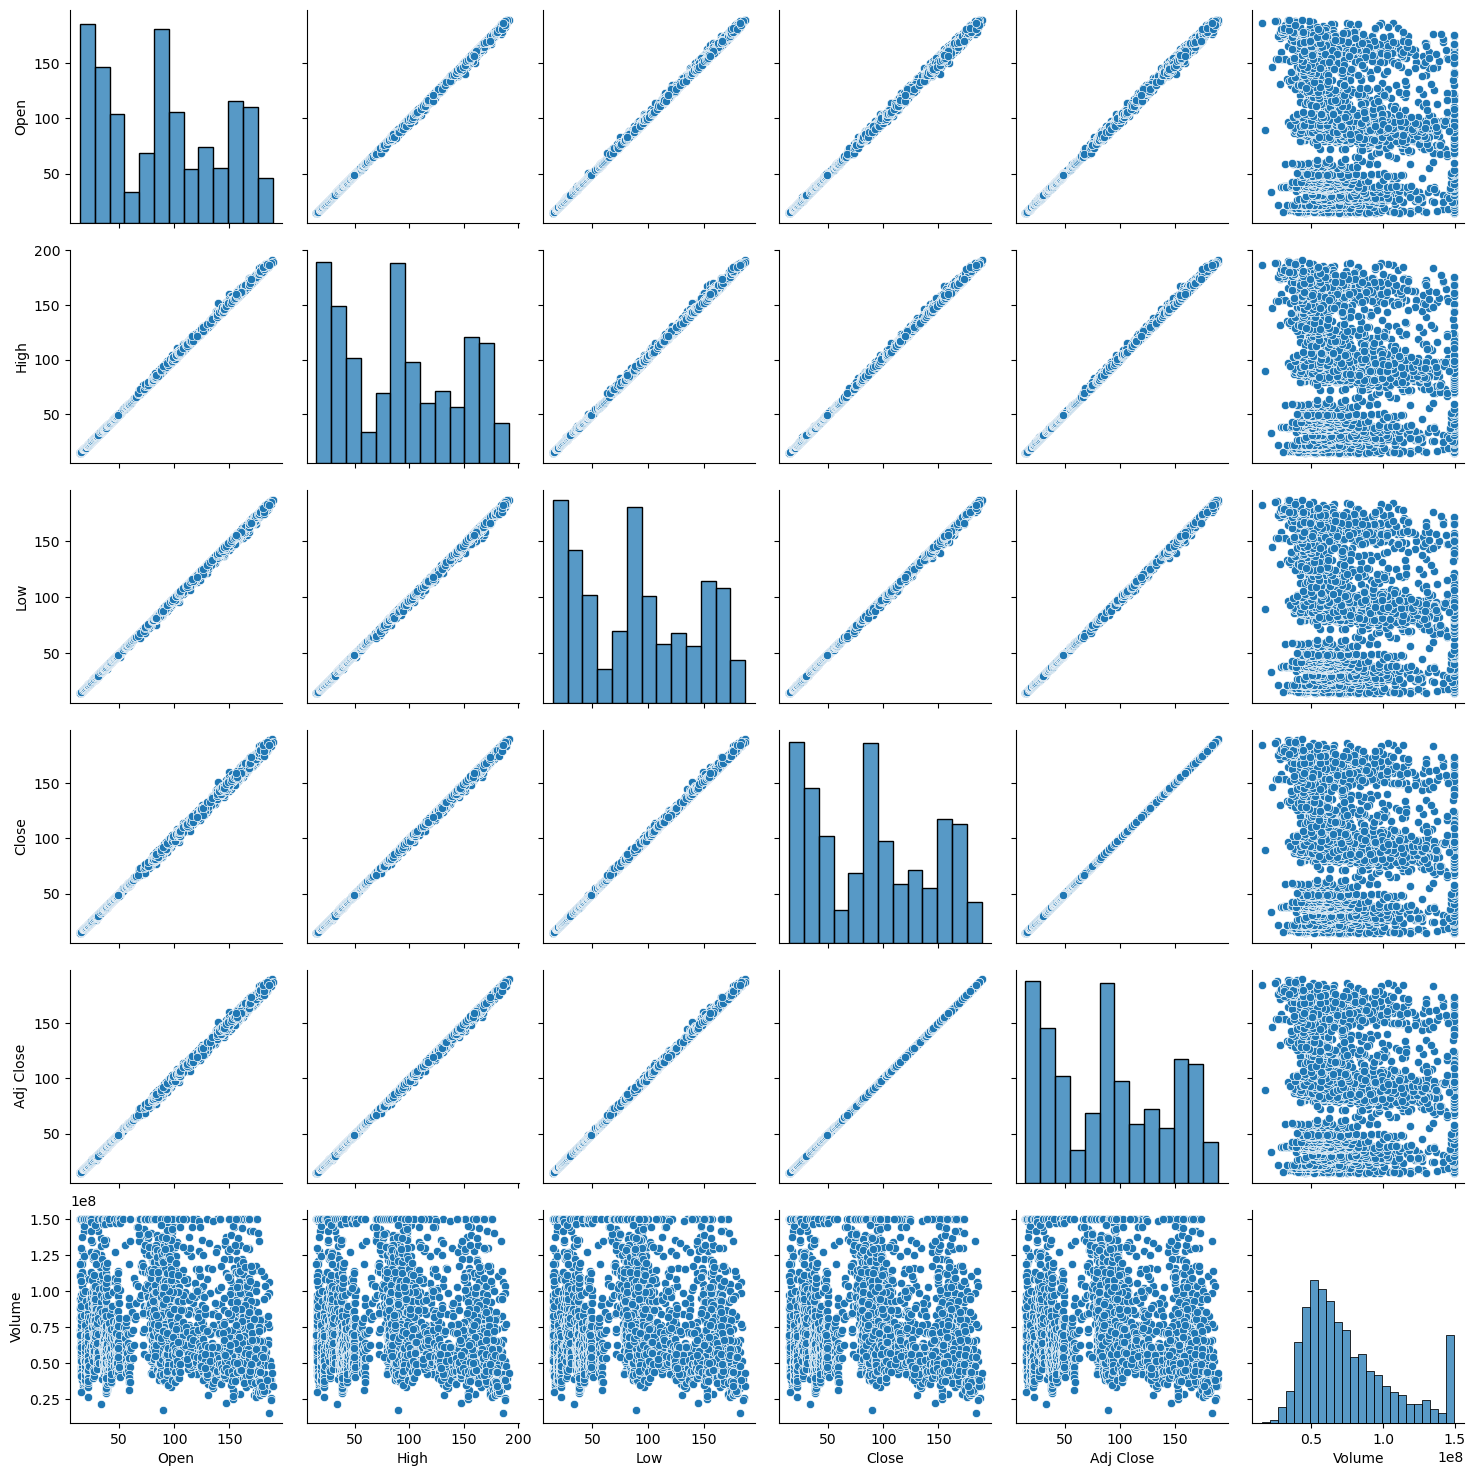

In [ ]:
# Create pairplot
sns.pairplot(amazon_price[['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']])
plt.show()

## Preprocessing

#### Add Technical Indicators

In [ ]:
import talib

In [ ]:
def feature_construction(df):
    # Simple Moving Averages (SMA)
    df['SMA5'] = talib.SMA(df['Close'], timeperiod=5)
    df['SMA10'] = talib.SMA(df['Close'], timeperiod=10)

    # Weighted Moving Averages (WMA)
    df['wma5'] = talib.WMA(df['Close'], timeperiod=5)
    df['wma10'] = talib.WMA(df['Close'], timeperiod=10)

    # Moving Average Convergence Divergence (MACD)
    macd, macd_signal, macd_hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=6)
    df['macd'] = macd

    # Commodity Channel Index (CCI)
    df['cci'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=20)

    # Price Rate of Change (ROC)
    df['roc'] = talib.ROC(df['Close'], timeperiod=10)

    # Relative Strength Index (RSI)
    df['rsi'] = talib.RSI(df['Close'], timeperiod=14)

    # Momentum
    df['momentum'] = talib.MOM(df['Close'], timeperiod=10)

    # Percentage Price Oscillator (PPO)
    df['ppo'] = talib.PPO(df['Close'], fastperiod=5, slowperiod=10)

    # Standard Deviation (STD)
    df['std'] = talib.STDDEV(df['Close'], timeperiod=5)

    # Stochastic Oscillator (%K)
    slowk, slowd = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period=14)
    df['stoch_k'] = slowk

    # %D line (3-period moving average of %K)
    df['stoch_d'] = talib.SMA(slowk, timeperiod=3)

    df = df.dropna()
    return df


In [ ]:
# Preprocess the data and engineer features
amazon_price_processed = feature_construction(amazon_price)
amazon_price_processed

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-06-12   16.777500   16.777500   16.233000   16.295500   16.295500   
2014-06-13   16.352501   16.465000   16.176500   16.313499   16.313499   
2014-06-16   16.243000   16.434500   16.176001   16.381001   16.381001   
2014-06-17   16.377001   16.566999   16.261499   16.281000   16.281000   
2014-06-18   16.400000   16.787500   16.250000   16.719000   16.719000   
...                ...         ...         ...         ...         ...   
2024-05-09  188.880005  191.699997  187.440002  189.500000  189.500000   
2024-05-10  189.160004  189.889999  186.929993  187.479996  187.479996   
2024-05-13  188.000000  188.309998  185.360001  186.570007  186.570007   
2024-05-14  183.820007  187.720001  183.449997  187.070007  187.070007   
2024-05-15  185.770004  186.719299  182.729996  184.329895  184.329895   

                 Volume        SMA5       SMA10        wma5       wma10  \
Date                                                                      
2014-06-12   85526000.0   16.506900   16.048100   16.507500   16.274973   
2014-06-13   55296000.0   16.472900   16.116700   16.443033   16.323227   
2014-06-16   48996000.0   16.474100   16.210600   16.412400   16.371282   
2014-06-17   58482000.0   16.406200   16.302750   16.348033   16.384082   
2014-06-18  128030000.0   16.398000   16.440750   16.452300   16.459764   
...                 ...         ...         ...         ...         ...   
2024-05-09   43368400.0  188.234000  184.047000  188.625999  186.206909   
2024-05-10   34141800.0  188.487997  184.833000  188.374664  186.831090   
2024-05-13   24898600.0  188.062000  185.394000  187.735334  187.146909   
2024-05-14   38652200.0  187.724002  186.601001  187.404670  187.451638   
2024-05-15   15533225.0  186.989981  187.133990  186.273301  187.038710   

                macd         cci       roc        rsi   momentum       ppo  \
Date                                                                         
2014-06-12  0.300140  108.892262  3.865764  67.804916   0.606500  2.858906   
2014-06-13  0.250090   80.610389  4.389697  68.026456   0.686000  2.210131   
2014-06-16  0.217748   71.965028  6.080819  68.890985   0.939000  1.625481   
2014-06-17  0.175442   68.431028  5.999546  66.042034   0.921500  0.634556   
2014-06-18  0.199919   87.744784  8.996676  71.584838   1.380000 -0.260024   
...              ...         ...       ...        ...        ...       ...   
2024-05-09  2.353210  124.435458  9.114989  61.745700  15.830002  2.274962   
2024-05-10  2.056451   97.541406  4.375905  57.972135   7.860001  1.977459   
2024-05-13  1.666699   73.068089  3.100133  56.302801   5.610001  1.439097   
2024-05-14  1.423807   58.652319  6.897147  57.034881  12.070007  0.601819   
2024-05-15  0.853086   33.364078  2.977595  51.902955   5.329895 -0.076955   

                 std    stoch_k    stoch_d  
Date                                        
2014-06-12  0.167093  78.703740  85.519692  
2014-06-13  0.184757  68.674536  78.136769  
2014-06-16  0.184136  61.713677  69.697318  
2014-06-17  0.180185  61.451572  63.946595  
2014-06-18  0.164113  68.781663  63.982304  
...              ...        ...        ...  
2024-05-09  1.117845  92.707525  94.640973  
2024-05-10  0.692428  88.830366  92.353506  
2024-05-13  1.012290  84.830585  88.789492  
2024-05-14  1.004917  81.639104  85.100018  
2024-05-15  1.661274  72.644834  79.704841  

[2499 rows x 19 columns]

#### Add Target Column

In [ ]:
amazon_price_processed['TargetNextClose'] = amazon_price_processed['Close'].shift(-1)

C:\Users\mofok\AppData\Local\Temp\ipykernel_25872\3255203154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_price_processed['TargetNextClose'] = amazon_price_processed['Close'].shift(-1)


#### Delete Nan Value in the Target colum

In [ ]:
amazon_price_processed.dropna(inplace=True)

C:\Users\mofok\AppData\Local\Temp\ipykernel_25872\559951929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_price_processed.dropna(inplace=True)


#### Drop Close, Volume and Adj Close

In [ ]:
amazon_price_processed.drop(columns=['Close','Volume','Adj Close'], inplace=True)

C:\Users\mofok\AppData\Local\Temp\ipykernel_25872\1233591140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_price_processed.drop(columns=['Close','Volume','Adj Close'], inplace=True)


#### Check the relation of attributes to target column

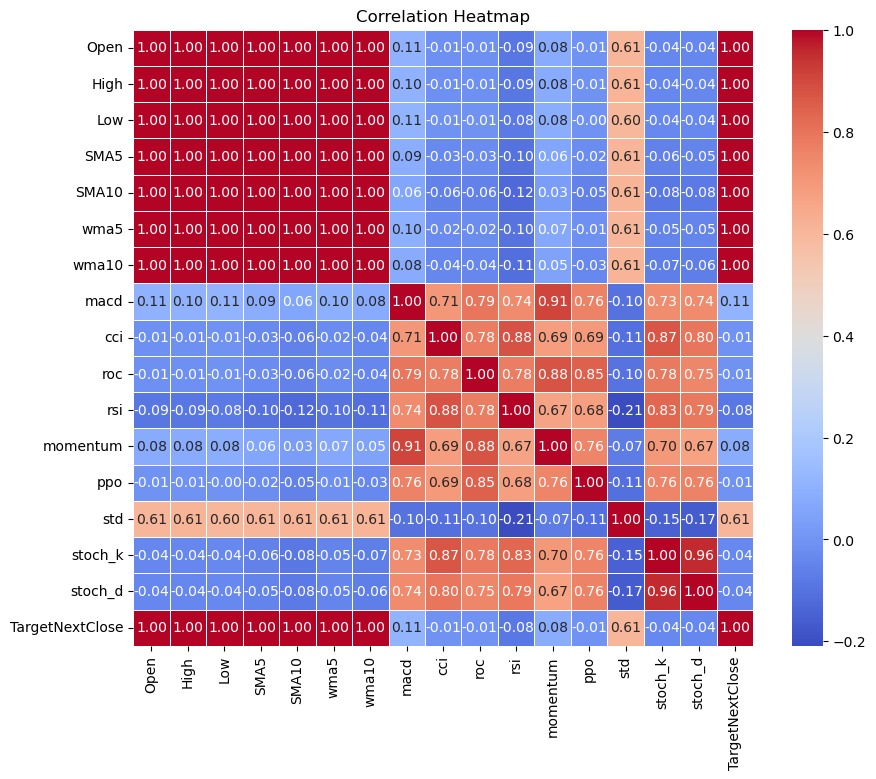

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(amazon_price_processed.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Normalize the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(amazon_price_processed)
print(data_set_scaled)

[[0.0146193  0.01273571 0.01173516 ... 0.79405024 0.86896091 0.0112245 ]
 [0.0121899  0.01097196 0.01140903 ... 0.69118551 0.79148625 0.01160989]
 [0.01156396 0.01079981 0.01140615 ... 0.61979132 0.70292463 0.01103895]
 ...
 [1.         0.98978436 0.99705605 ... 0.89791419 0.94067335 0.98327176]
 [0.99336913 0.98086681 0.98799352 ... 0.85689036 0.90327342 0.98612642]
 [0.96947527 0.97753687 0.97696834 ... 0.82415687 0.86455695 0.97048227]]


In [ ]:
print(amazon_price_processed.columns)

Index(['Open', 'High', 'Low', 'SMA5', 'SMA10', 'wma5', 'wma10', 'macd', 'cci',
       'roc', 'rsi', 'momentum', 'ppo', 'std', 'stoch_k', 'stoch_d',
       'TargetNextClose'],
      dtype='object')


#### Reshape

In [ ]:
# multiple feature from data provided to the model
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(16):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(X.shape)
print(y.shape)

2498
(2468, 30, 16)
(2468, 1)


#### Split the data into training and testing

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1974
(1974, 30, 16)
(494, 30, 16)
(1974, 1)
(494, 1)
[[0.00955168]
 [0.00943464]
 [0.01015115]
 ...
 [0.51242488]
 [0.5276973 ]
 [0.5522616 ]]


# Model Design

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Activation

# Define model architecture with Dropout layer
lstm_input = Input(shape=(backcandles, 16), name='lstm_input')
lstm_layer = LSTM(75, name='first_layer')(lstm_input)
dropout_layer = Dropout(0.2)(lstm_layer)  # Dropout rate can be adjusted as needed
dense_layer = Dense(1, name='dense_layer')(dropout_layer)
output = Activation('linear', name='output')(dense_layer)

# Create the model
model = Model(inputs=lstm_input, outputs=output)
# Model summary
print('Model Summary:')
model.summary()

Model Summary:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 16)]          0         
                                                                 
 first_layer (LSTM)          (None, 75)                27600     
                                                                 
 dropout_1 (Dropout)         (None, 75)                0         
                                                                 
 dense_layer (Dense)         (None, 1)                 76        
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 27676 (108.11 KB)
Trainable params: 27676 (108.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

In [ ]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),shuffle=True,epochs=30,batch_size=32,verbose=1)

Epoch 1/30
62/62 [==============================] - 4s 24ms/step - loss: 0.0349 - val_loss: 0.0016
Epoch 2/30
62/62 [==============================] - 1s 13ms/step - loss: 0.0057 - val_loss: 0.0012
Epoch 3/30
62/62 [==============================] - 1s 13ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 4/30
62/62 [==============================] - 1s 13ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 5/30
62/62 [==============================] - 1s 13ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 6/30
62/62 [==============================] - 1s 14ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 7/30
62/62 [==============================] - 1s 14ms/step - loss: 0.0021 - val_loss: 9.5423e-04
Epoch 8/30
62/62 [==============================] - 1s 13ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 9/30
62/62 [==============================] - 1s 13ms/step - loss: 0.0019 - val_loss: 9.7961e-04
Epoch 10/30
62/62 [==============================] - 1s 13ms/step - loss: 0.0018 - val_loss: 0.0010
E

# Model Testing

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 1s 6ms/step
[0.5247727] [0.57549278]
[0.5320429] [0.60439904]
[0.5443984] [0.61281739]
[0.5606276] [0.63466694]
[0.5741852] [0.61661979]
[0.58846813] [0.63055053]
[0.59530485] [0.62033085]
[0.6051826] [0.60993991]
[0.60596937] [0.58122209]
[0.6061115] [0.54411157]


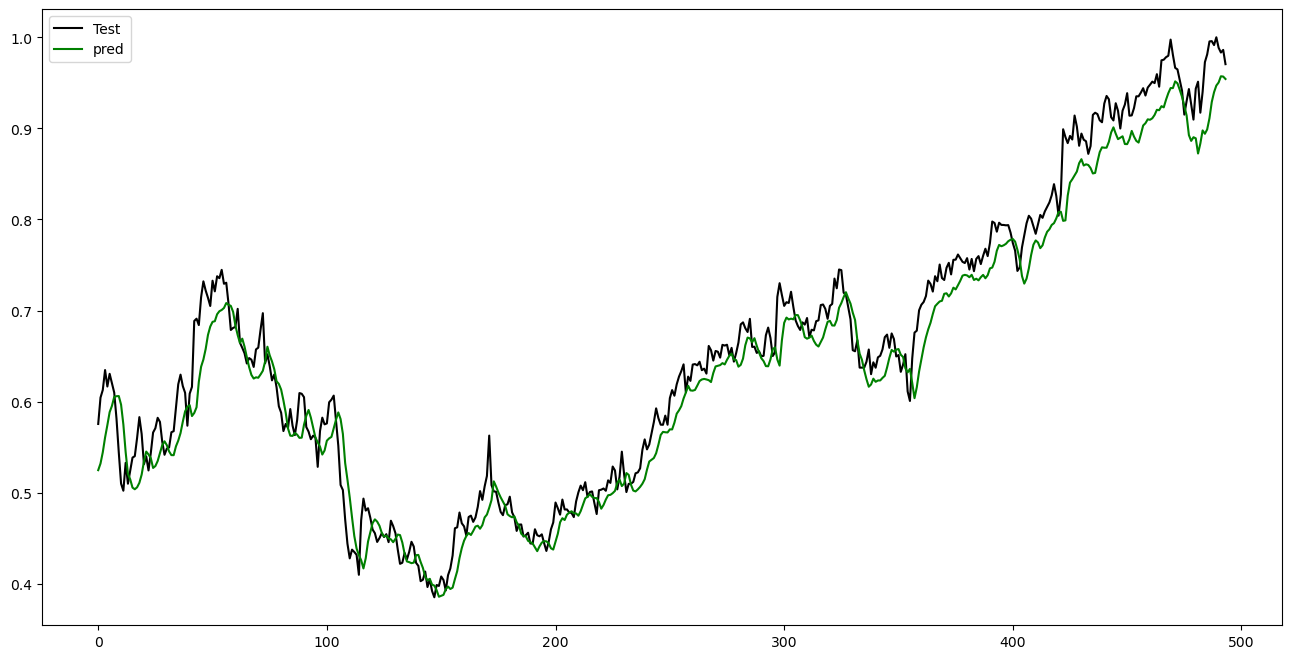

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

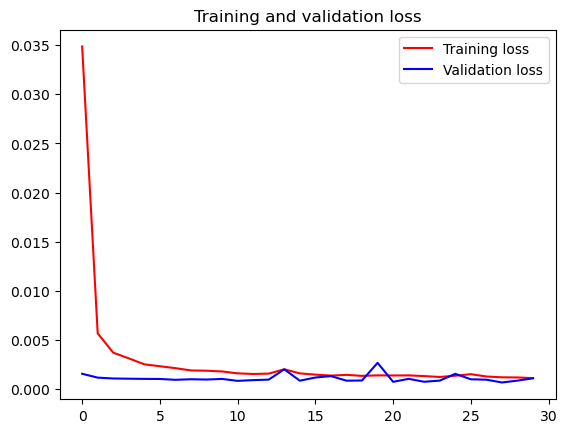

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Assuming y_true and y_pred are your true and predicted values
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("MSE: ", mse)
print("MAE: ", mae)
print("R Squared: ", r2)

MSE:  0.0011074360493591995
MAE:  0.026490327142753387
R Squared:  0.9553207466646038


#### Predict Next Day Closing Price

In [ ]:
from numpy import array

# Ensure y has enough sequences
if len(X_test) < backcandles:
    raise ValueError("The dataset y must contain at least backcandles number of elements")

# Initialize temp_input using the last backcandles elements from x
temp_input = np.array(X_test[-backcandles:])

# Check the shape of temp_input
print(f"Shape of temp_input: {temp_input.shape}")

# Initialize the output list
lst_output = []

# Prepare the input for the model
x_input = temp_input

# Check the shape of x_input before prediction
print(f"Shape of x_input: {x_input.shape}")

# Predict the next day's closing price
yhat = model.predict(x_input, verbose=0)

# Append the prediction to the output list
lst_output.extend(yhat.tolist())

print("Next day predicted closing price: ", lst_output[0])

Shape of temp_input: (30, 30, 16)
Shape of x_input: (30, 30, 16)
Next day predicted closing price:  [0.9199438691139221]
